In [1]:
import re
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def tweets_to_worldCloud(all_tweets):
    # Clean the text by removing mentions (@username), hashtags (#), and emojis
    all_tweets = re.sub(r'@\w+', '', all_tweets)
    all_tweets = re.sub(r'#\w+', '', all_tweets)
    all_tweets = re.sub(r'[^\w\s]', '', all_tweets)

    # Load the Twitter logo image as the mask for the word cloud
    twitter_mask = np.array(Image.open("twitter_mask.png"))

    # Generate the word cloud with the Twitter logo shape and light color scheme
    wc = WordCloud(background_color="white", max_words=2000, mask=twitter_mask,
                stopwords=STOPWORDS, contour_color='steelblue',min_word_length=4)

    wordcloud = wc.generate(all_tweets)

    # Plot the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

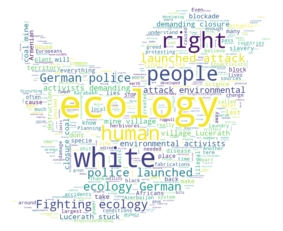

In [4]:
from kafka import KafkaConsumer
import time
import json

consumer = KafkaConsumer("negative-tweets", bootstrap_servers="localhost:9092", group_id =None, auto_offset_reset ='earliest')

all_tweets = []
i = 0
for msg in consumer:
    i += 1
    tweet = json.loads(msg.value)
    if i < 40:
        all_tweets.append(str(tweet['content']))

    if i == 40: # == for test, may change for >= and add time.sleep
        all_tweets.pop(0)
        all_tweets.append(str(tweet['content']))
        tweets_to_worldCloud(' '.join(all_tweets))
        # time.sleep(5)